In [16]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.ticker as ticker
import pandas as pd
import helmeos

In [17]:
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [89]:
working_directory = '/home/cnchong/Codes/cumc3d/model/Type_Ia/outfile'
profile_directory = '/home/cnchong/Codes/cumc3d/model/Type_Ia/profile'
n = 7
gconst = 6.67430e-8
clight = 2.99792458e10
solar = 1.98847e33
lencgs2code = (clight**2)/(solar*gconst)
masscgs2code = (1.0e0/solar)
rhocgs2code = (masscgs2code/lencgs2code**3)
tcgs2code = (clight**3)/(solar*gconst)
energycgs2code = (1.0E0/clight**2)
me2 = 9.1093837015e-28*masscgs2code
mb2 = 1.66053906660e-24*masscgs2code
ye = 0.5e0
h_bar = (1.054571817e-27)*(lencgs2code**2*masscgs2code/tcgs2code)
amax = (me2**4)/(2.4e1*np.pi**2*h_bar**3)
bmax = (mb2*me2**3)/(3.0e0*np.pi**2*h_bar**3*ye)

In [90]:
def xe(rho):
    return (rho/bmax)**(1.0e0/3.0e0)
def dpdx(x):
    return 8.0e0*x**4/np.sqrt(x**2 + 1.0e0)
def cs(rho):
    return np.sqrt(amax*dpdx(xe(rho))/3.0e0/(rho**2*bmax)**(1.0e0/3.0e0))

In [91]:
def helmeos_e(dens, temp, abar, zbar):
    dens = dens/rhocgs2code
    temp = temp*1e9
    out = helmeos.eos_DT(dens, temp, abar, zbar)
    return out['etot']*energycgs2code
def helmeos_p(dens, temp, abar, zbar):
    dens = dens/rhocgs2code
    temp = temp*1e9
    out = helmeos.eos_DT(dens, temp, abar, zbar)
    return out['ptot']*(masscgs2code*energycgs2code/lencgs2code**3)
def helmeos_cs(dens, temp, abar, zbar):
    dens = dens/rhocgs2code
    temp = temp*1e9
    out = helmeos.eos_DT(dens, temp, abar, zbar)
    return out['cs']/clight

In [92]:
def easy_animation(xxf,yyf,data_list, name, ani_name):
    data_list_arr = np.array(data_list)
    fig = plt.figure()
    camera = Camera(fig)
    ax = plt.axes()
    vmin = np.min(data_list_arr)
    vmax = np.max(data_list_arr)
    print(vmin)
    print(vmax)
    for i in range(len(data_list)):
        prim = data_list[i]
        quan = prim
        plt.pcolormesh(xxf,yyf,quan,vmin=vmin,vmax=vmax)
        ax.text(0.3, 1.01, str(name)+ ' at time step ' +str(i), transform=ax.transAxes)
        camera.snap()
    plt.colorbar(format=ticker.FuncFormatter(fmt))
    plt.annotate('max = '+np.format_float_scientific(vmax, precision=3, exp_digits=1), xy=(0.05, 0.95), xycoords='axes fraction', color = 'red')
    plt.annotate('min = '+np.format_float_scientific(vmin, precision=3, exp_digits=1), xy=(0.05, 0.9), xycoords='axes fraction', color = 'red')
    ani = camera.animate()
    ani.save(working_directory+'/'+str(ani_name)+'.mp4')
    plt.close()
def easy_animation_levelset(xx,yy,xxf,yyf,data_list, levelset, name, ani_name):
    data_list_arr = np.array(data_list)
    fig = plt.figure()
    camera = Camera(fig)
    ax = plt.axes()
    vmin = np.min(data_list_arr)
    vmax = np.max(data_list_arr)
    print(vmin)
    print(vmax)
    for i in range(len(data_list)):
        prim = data_list[i]
        quan = prim
        plt.contour(xx,yy,levelset[i],levels=[0],colors=['red'])
        plt.pcolormesh(xxf,yyf,quan,vmin=vmin,vmax=vmax,cmap='inferno')
        ax.text(0.3, 1.01, str(name)+ ' at time step ' +str(i), transform=ax.transAxes)
        camera.snap()
    plt.colorbar(format=ticker.FuncFormatter(fmt))
    plt.annotate('max = '+np.format_float_scientific(vmax, precision=3, exp_digits=1), xy=(0.05, 0.95), xycoords='axes fraction', color = 'red')
    plt.annotate('min = '+np.format_float_scientific(vmin, precision=3, exp_digits=1), xy=(0.05, 0.9), xycoords='axes fraction', color = 'red')
    ani = camera.animate()
    ani.save(working_directory+'/'+str(ani_name)+'.mp4')
    plt.close()
def easy_animation_bfield(x1c,x3c,xxf,yyf,data_list, bfield, name, ani_name):
    data_list_arr = np.array(data_list)
    bfield_arr = np.array(bfield)
    fig = plt.figure()
    camera = Camera(fig)
    ax = plt.axes()
    vmin = np.min(data_list_arr)
    vmax = np.max(data_list_arr)
    bmin = np.min(bfield_arr)
    bmax = np.max(bfield_arr)
    print(vmin)
    print(vmax)
    for i in range(len(data_list)):
        prim = data_list[i]
        quan = prim
        plt.pcolormesh(xxf,yyf,quan,vmin=vmin,vmax=vmax,cmap='binary')
        plt.streamplot(x1c,x3c,bfield[i][0,:,:].T,bfield[0][2,:,:].T, density = 1.5, color=np.log(mag_list[i][0,:,:].T**2+mag_list[0][2,:,:].T**2), cmap='inferno')
        ax.text(0.3, 1.01, str(name)+ ' at time step ' +str(i), transform=ax.transAxes)
        camera.snap()
    plt.colorbar(format=ticker.FuncFormatter(fmt))
    plt.annotate('max = '+np.format_float_scientific(bmin, precision=3, exp_digits=1), xy=(0.05, 0.95), xycoords='axes fraction', color = 'red')
    plt.annotate('min = '+np.format_float_scientific(bmax, precision=3, exp_digits=1), xy=(0.05, 0.9), xycoords='axes fraction', color = 'red')
    ani = camera.animate()
    ani.save(working_directory+'/'+str(ani_name)+'.mp4')
    plt.close()

def animation_1D(x1c,data_list, log_flag, name, ani_name):
    fig = plt.figure()
    camera = Camera(fig)
    ax = plt.axes()
    j = 0
    for i in data_list:
        j+= 1
        m = int(i.shape[1]/2)
        if log_flag == 1:
            plt.plot(x1c,np.log(i[:,m]), c = 'black')
        else:
            plt.plot(x1c,i[:,m],c='black')
        ax.text(0.25, 1.01, str(name)+ ' at time step ' +str(j), transform=ax.transAxes)
        camera.snap()
    ani = camera.animate()
    ani.save(working_directory+'/'+str(ani_name)+'.mp4')
    plt.close()

def code_helm(rho_list, T_list, abar_list, zbar_list, e_list, name, ani_name):
    fig = plt.figure()
    camera = Camera(fig)
    ax = plt.axes()
    helm_elist = helmeos_e(np.array(rho_list), np.array(T_list), np.array(abar_list), np.array(zbar_list))
    for i in range(len(e_list)):
        plt.scatter(T_list[i].flatten(), e_list[i].flatten(), color='black')
        plt.scatter(T_list[i].flatten(), helm_elist[i].flatten(), facecolors='none', edgecolors='red')
        ax.text(0.25, 1.01, str(name)+ ' at time step ' +str(i), transform=ax.transAxes)
        camera.snap()
    ani = camera.animate()
    ani.save(working_directory+'/'+str(ani_name)+'.mp4')
    plt.close()

In [93]:
# Face value
x1f = np.loadtxt(profile_directory+'/hydro_x1_fgrid.dat').T
x3f = np.loadtxt(profile_directory+'/hydro_x3_fgrid.dat').T
# Center value
x1f = x1f [3:-3]*lencgs2code # Remove BC
x1c = (x1f[1:]+x1f[:-1])/2 #mid pt
x3f = x3f[3:-3]*lencgs2code # Remove BC
x3c = (x3f[1:]+x3f[:-1])/2 #mid pt

xx,yy= np.meshgrid(x1c,x3c,indexing='ij')

xxf, yyf = np.meshgrid(x1f,x3f,indexing='ij')

In [94]:
bfield_list = []
for i in range(n):
    filename = working_directory+"/rkiter-"+str(i)+"-nm.hdf5"
    f = h5py.File(filename, "r")
    bfield = f['bfield'][:]
    bfield = bfield.T
    bfield_list.append(bfield)
    f.close()
bfield_arr = np.array(bfield_list)

efield_x_list = []
for i in range(n):
    filename = working_directory+"/rkiter-"+str(i)+"-nm.hdf5"
    f = h5py.File(filename, "r")
    efield_x = f['efield_x'][:]
    efield_x = efield_x.T
    efield_x_list.append(efield_x)
    f.close()
efield_x_arr = np.array(efield_x_list )

efield_y_list = []
for i in range(n):
    filename = working_directory+"/rkiter-"+str(i)+"-nm.hdf5"
    f = h5py.File(filename, "r")
    efield_y = f['efield_y'][:]
    efield_y = efield_y.T
    efield_y_list.append(efield_y)
    f.close()
efield_y_arr = np.array(efield_y_list)

efield_z_list = []
for i in range(n):
    filename = working_directory+"/rkiter-"+str(i)+"-nm.hdf5"
    f = h5py.File(filename, "r")
    efield_z = f['efield_z'][:]
    efield_z = efield_z.T
    efield_z_list.append(efield_z)
    f.close()
efield_z_arr = np.array(efield_z_list)

dbdt_list = []
for i in range(n):
    filename = working_directory+"/rkiter-"+str(i)+"-nm.hdf5"
    f = h5py.File(filename, "r")
    dbdt = f['dbdt'][:]
    dbdt = dbdt.T
    dbdt_list.append(dbdt)
    f.close()
dbdt_arr = np.array(dbdt_list)

In [95]:
efield_x.shape

(402, 3, 802)

In [96]:
bfield.shape

(3, 403, 4, 803)

In [97]:
dbdt_arr.shape

(7, 3, 403, 4, 803)

In [98]:
t = n-1
ix = 0
iy = 1
iz = 2

/tmp/ipykernel_1034060/3682307514.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(efield_x_arr[t,:,2,:]-efield_x_arr[t,:,1,:])).T, cmap = 'inferno')


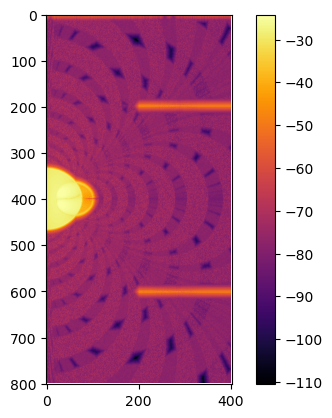

In [99]:
plt.imshow(np.log(np.abs(efield_x_arr[t,:,2,:]-efield_x_arr[t,:,1,:])).T, cmap = 'inferno')
plt.colorbar()

/tmp/ipykernel_1034060/2616871160.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(efield_z_arr[t,:,2,:]-efield_z_arr[t,:,1,:])).T, cmap = 'inferno')


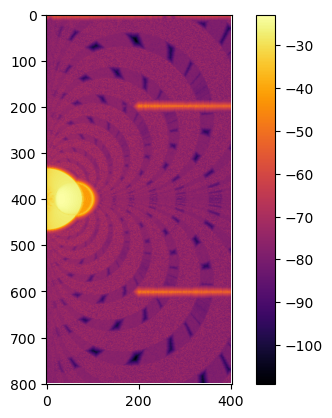

In [100]:
plt.imshow(np.log(np.abs(efield_z_arr[t,:,2,:]-efield_z_arr[t,:,1,:])).T, cmap = 'inferno')
plt.colorbar()

In [113]:
bfield_arr[t,iy,:,2,:]-bfield_arr[0,iy,:,2,:]

array([[-4.43823549e-19, -4.43823549e-19, -4.43823549e-19, ...,
         1.59842612e-31,  4.49533699e-32,  4.49533699e-32],
       [ 1.67404255e-18,  1.67404255e-18,  1.67404255e-18, ...,
        -9.83677432e-32, -9.14218756e-32, -9.14218756e-32],
       [ 1.67404255e-18,  1.67404255e-18,  1.67404255e-18, ...,
        -9.83677432e-32, -9.14218756e-32, -9.14218756e-32],
       ...,
       [-5.45267772e-20, -5.45267772e-20, -5.45267772e-20, ...,
         2.11635141e-32,  3.16718271e-31,  3.16718271e-31],
       [ 5.82988771e-20,  5.82988771e-20,  5.82988771e-20, ...,
         1.83066929e-31,  5.10617426e-32,  5.10617426e-32],
       [ 5.82988771e-20,  5.82988771e-20,  5.82988771e-20, ...,
         1.83066929e-31,  5.10617426e-32,  5.10617426e-32]])

In [112]:
bfield_arr[t,iy,:,1,:]-bfield_arr[0,iy,:,1,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

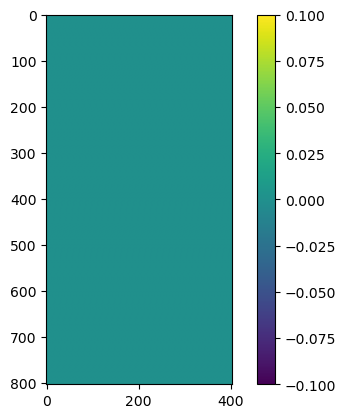

In [111]:
plt.imshow((bfield_arr[t,iy,:,1,:]-bfield_arr[0,iy,:,1,:]).T)
plt.colorbar()

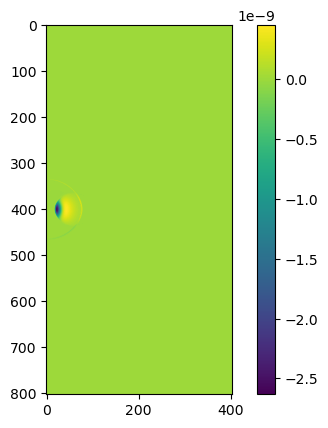

In [106]:
plt.imshow((bfield_arr[t,iy,:,2,:]-bfield_arr[t,iy,:,1,:]).T)
plt.colorbar()

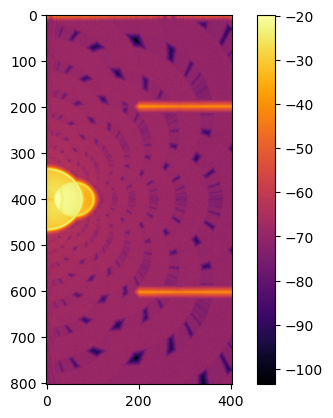

In [101]:
plt.imshow(np.log(np.abs(bfield_arr[t,iy,:,2,:]-bfield_arr[t,iy,:,1,:])).T, cmap = 'inferno')
plt.colorbar()

/tmp/ipykernel_1034060/1519528197.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(dbdt_arr[t,iy,:,2,:]-dbdt_arr[t,iy,:,1,:])).T, cmap = 'inferno')


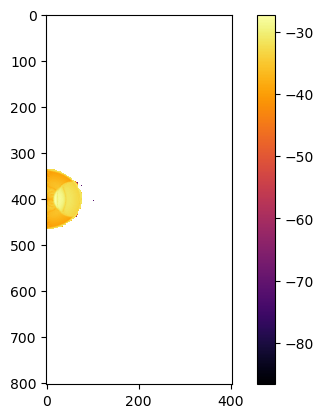

In [102]:
plt.imshow(np.log(np.abs(dbdt_arr[t,iy,:,2,:]-dbdt_arr[t,iy,:,1,:])).T, cmap = 'inferno')
plt.colorbar()